<a href="https://colab.research.google.com/github/bhavikakaura/Dataa-for-Risk-Analysis-of-5G-Network-Security/blob/main/Event_Tree_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

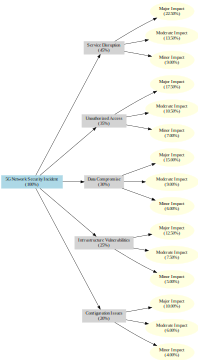

In [1]:
# STEP 1: Install required packages
!pip install graphviz

# STEP 2: Import libraries
from graphviz import Digraph

# STEP 3: Define Event Tree Data
initial_event = "5G Network Security Incident"
intermediate_events = {
    "Service Disruption": 0.45,
    "Unauthorized Access": 0.35,
    "Data Compromise": 0.30,
    "Infrastructure Vulnerabilities": 0.25,
    "Configuration Issues": 0.20
}

impact_outcomes = {
    "Major Impact": 0.50,
    "Moderate Impact": 0.30,
    "Minor Impact": 0.20
}

# STEP 4: Build Event Tree Diagram
dot = Digraph(comment="5G Network Event Tree", format='png')
dot.attr(rankdir='LR', size='10,5')

# Add initial event node
dot.node('E0', f'{initial_event}\n(100%)', shape='box', style='filled', color='lightblue')

# Create intermediate events and connect to initial
for i, (event, prob) in enumerate(intermediate_events.items(), start=1):
    ev_node = f'E{i}'
    dot.node(ev_node, f'{event}\n({prob*100:.0f}%)', shape='box', style='filled', color='lightgrey')
    dot.edge('E0', ev_node)

    # Connect each intermediate event to outcome nodes
    for j, (impact, imp_prob) in enumerate(impact_outcomes.items(), start=1):
        impact_node = f'{ev_node}_O{j}'
        total_prob = prob * imp_prob
        dot.node(impact_node, f'{impact}\n({total_prob*100:.2f}%)', shape='ellipse', style='filled', color='lightyellow')
        dot.edge(ev_node, impact_node)

# STEP 5: Render the diagram
dot.render('5G_Event_Tree', view=True)
dot
